In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU

In [0]:
def generate_samples(n=1000):
    X1 = np.random.rand(n) - 0.5 # -0.5 -> 0.5
    X2 = X1**2
    X1 = X1.reshape(n,1)
    X2 = X2.reshape(n,1)
    return np.hstack((X1, X2)) # array 2 cols

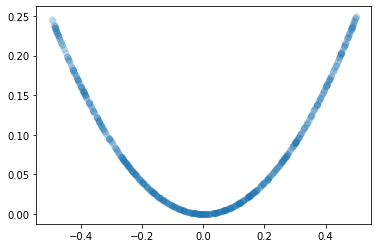

In [109]:
data = generate_samples()
plt.scatter(data[:,0],data[:,1],alpha = 0.1)
plt.show()

In [0]:
def define_discriminator(n_inputs = 2):
    model = Sequential()
    model.add(Dense(32, 
                    kernel_initializer = 'he_uniform',
                    input_dim = n_inputs))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy',
                  optimizer = 'adam', metrics = ['accuracy'])
    return model

In [0]:
from tensorflow.keras.utils import plot_model

In [0]:
# model = define_discriminator()

# model.summary()

# plot_model(model, to_file = 'discri_plot.png',show_shapes = True)

In [0]:
# def generate_fake_samples(n):
#     X1 = -1 + np.random.rand(n)*2 #[-1,1]
#     X2 = -1 + np.random.rand(n)*2 #[-1,1]

#     X1 = X1.reshape(n,1)
#     X2 = X2.reshape(n,1)
#     X = np.hstack((X1,X2))
#     y = np.zeros((n,1))
#     return X, y


In [0]:
def generate_real_samples(n=1000):
    X1 = np.random.rand(n)*2 - 1 # [-1.0,1.0]
    X2 = X1**2
    X1 = X1.reshape(n,1)
    X2 = X2.reshape(n,1)
    
    X = np.hstack((X1,X2))
    y = np.ones((n,1))
    return X, y

In [0]:
# def train_discriminator(model, n_epochs = 1000, n_batch =128):
#     half_batch = int(n_batch /2)
#     for i in range(n_epochs):
#         X_real, y_real = generate_real_samples(half_batch)
#         X_fake, y_fake = generate_fake_samples(half_batch)
#         model.train_on_batch(X_real, y_real)
#         model.train_on_batch(X_fake, y_fake)

#         _, acc_real = model.evaluate(X_real, y_real, verbose = 0)
#         _, acc_fake = model.evaluate(X_fake, y_fake, verbose = 0)
#         print(i, acc_real, acc_fake)

In [0]:
# model = define_discriminator()
# train_discriminator(model)

In [0]:
def define_generator(latent_dim, n_outputs = 2):
    model = Sequential()
    model.add(Dense(16, 
                    kernel_initializer='he_uniform',
                    input_dim = latent_dim))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Dense(n_outputs, activation = 'linear'))
    return model


In [0]:
# model = define_generator(5)
# model.summary()
# plot_model(model, to_file='gener_plot.png', show_shapes= True)


In [0]:
def generate_latent_points(latent_dim, n):
    x_input = np.random.randn(latent_dim*n)
    x_input = x_input.reshape(n, latent_dim)
    return x_input

In [0]:
def generate_fake_samples(generator, latent_dim, n):
    x_input = generate_latent_points(latent_dim, n)
    X = generator.predict(x_input)
    y = np.zeros((n,1))
    return X, y
    # plt.scatter(X[:,0],X[:,1])
    # plt.show()

In [0]:
# latent_dim = 5
# model = define_generator(latent_dim)
# generate_fake_samples(model, latent_dim, 100)

In [0]:
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam')
    return model

In [0]:
# latent_dim = 5

# discriminator = define_discriminator()

# generator = define_generator(latent_dim)

# gan_model = define_gan(generator, discriminator)

# gan_model.summary()

# plot_model(gan_model, to_file='gan_plot.png',
#            show_shapes = True)

In [0]:
def summarize_performance(epoch, generator,
                          discriminator, latent_dim, n=100):
    x_real, y_real = generate_real_samples(n)
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose = 0)

    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose = 0)

    print(epoch, acc_real, acc_fake)

    plt.scatter(x_real[:,0],x_real[:,1], color = 'red')
    plt.scatter(x_fake[:,0],x_fake[:,1], color = 'blue')

    # save plot to file
    filename = 'generated_plot_e%03d.png' % (epoch+1)
    plt.savefig(filename)
    plt.close()

In [0]:
def train(g_model, d_model, gan_model, latent_dim,
          n_epochs = 10000, n_batch = 128, n_eval = 2000):
    half_batch = int(n_batch/2)

    for i in range(n_epochs):
        x_real, y_real = generate_real_samples(half_batch)
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        # Danh lua Discriminator
        x_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = np.ones((n_batch, 1))

        gan_model.train_on_batch(x_gan, y_gan)
        # evaluate the model every n_eval epochs
        if (i+1) % n_eval == 0:
            summarize_performance(i, g_model, d_model, latent_dim)

In [126]:
latent_dim = 5
discriminator = define_discriminator()
generator = define_generator(latent_dim)
gan_model = define_gan(generator, discriminator)
train(generator, discriminator, gan_model, latent_dim)

1999 0.5 0.6100000143051147
3999 0.44999998807907104 0.46000000834465027
5999 0.47999998927116394 0.5699999928474426
7999 0.6299999952316284 0.5600000023841858
9999 0.5199999809265137 0.5099999904632568
